# Iris Dataset Exploration and Prediction

This notebook explores the famous **Iris dataset**, a classic dataset in machine learning and statistics. The Iris dataset contains 150 samples of iris flowers from three different species: *setosa*, *versicolor*, and *virginica*. Each sample includes four features: sepal length, sepal width, petal length, and petal width (all measured in centimeters).

## About the Iris Dataset

- **Samples:** 150
- **Features:** 
  - Sepal length (cm)
  - Sepal width (cm)
  - Petal length (cm)
  - Petal width (cm)
- **Target:** Species (*setosa*, *versicolor*, *virginica*)

The dataset is widely used for classification tasks and is a great starting point for learning about data analysis, visualization, and machine learning.

## What This Notebook Does

- **Loads and inspects** the Iris dataset using pandas and scikit-learn.
- **Explores the data** with summary statistics and value counts for each species.
- **Visualizes feature distributions** using histograms and pair plots to understand the relationships between features and species.

Further sections can include building and evaluating machine learning models to predict the species of iris flowers based on their features.

In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Understanding the Dataset Structure with `.info()`

The `iris_df.info()` method provides a concise summary of the DataFrame, including:

- The number of entries (rows) and columns.
- The column names and their data types.
- The number of non-null (non-missing) values in each column.
- The memory usage of the DataFrame.

**Insights from the output:**
- All 150 rows have complete data for each feature and the species column (no missing values).
- All feature columns are of type `float64`, and the species column is of type `object` (string).
- The dataset is clean and ready for further analysis and visualization.

In [2]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Summary Statistics with `.describe()`

The `iris_df.describe()` method generates descriptive statistics for the numerical features in the dataset. It provides key metrics such as:

- **count:** Number of non-null entries for each feature (should be 150 for all).
- **mean:** Average value of each feature.
- **std:** Standard deviation, showing the spread of the data.
- **min:** Minimum value observed.
- **25% / 50% / 75%:** The 25th, 50th (median), and 75th percentiles, indicating the distribution of values.
- **max:** Maximum value observed.

**Observations from the output:**
- All features have 150 entries, confirming no missing data.
- Sepal and petal measurements vary across the dataset, with petal length and width showing greater spread (higher standard deviation) compared to sepal measurements.
- The range (min to max) for petal length and width is larger, which helps distinguish between the three iris species.
- The median and mean values are close for each feature, suggesting the distributions are fairly symmetric.

These statistics provide a quick overview of the data’s distribution and help identify any

In [3]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


## Species Distribution with `value_counts()`

The `iris_df['species'].value_counts()` method counts the number of samples belonging to each iris species in the dataset. This helps us understand the class distribution and check for any imbalance.

**Observations from the output:**
- Each of the three species (*setosa*, *versicolor*, *virginica*) has exactly 50 samples.
- The dataset is perfectly balanced, which is ideal for classification tasks as it prevents bias toward any particular class.

In [4]:
print(iris_df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Sepal Length Distribution

This histogram shows the distribution of sepal length measurements in the Iris dataset. By visualizing this feature, we can observe how sepal length varies among the samples and whether it helps distinguish between species.

**Observations:**
- Sepal length values range from about 4.3 cm to 7.9 cm.
- The distribution appears roughly normal, with a peak around 5.0–6.0 cm.
- There is some overlap in sepal length between species, so this feature alone may not perfectly separate all classes.

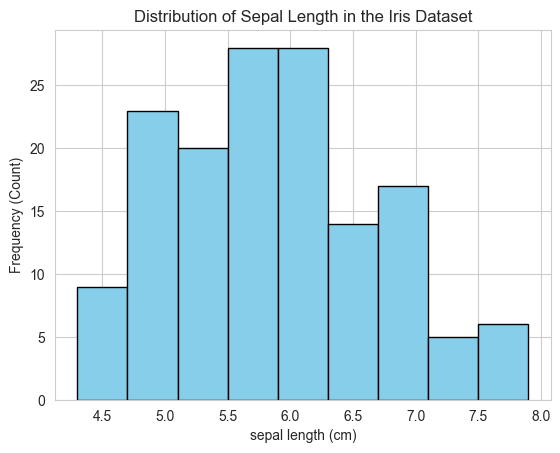

In [5]:
import matplotlib.pyplot as plt

feature_to_plot = iris_df['sepal length (cm)']
plt.hist(feature_to_plot, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('sepal length (cm)')
plt.ylabel('Frequency (Count)')
plt.title('Distribution of Sepal Length in the Iris Dataset')
plt.show()

## Petal Length Distribution

This histogram displays the distribution of petal length measurements in the Iris dataset. It provides insight into how petal length varies among the samples.

**Observations:**
- Petal length values range from about 1.0 cm to 6.9 cm.
- The distribution is clearly bimodal, indicating two main groups of petal lengths.
- The lower group corresponds to setosa, while the higher group includes versicolor and virginica, suggesting petal length is a strong feature for distinguishing setosa from the other species.

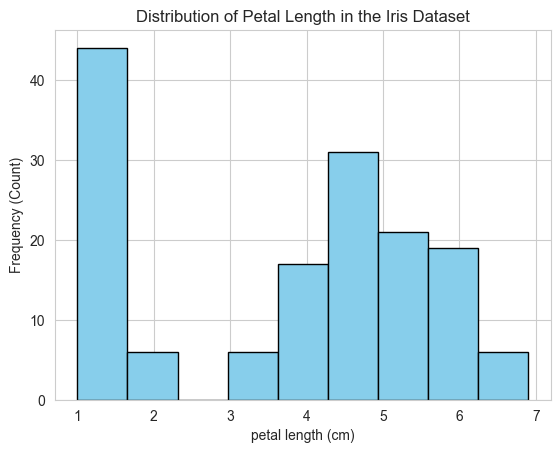

In [6]:
feature_to_plot = iris_df['petal length (cm)']
plt.hist(feature_to_plot, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('petal length (cm)')
plt.ylabel('Frequency (Count)')
plt.title('Distribution of Petal Length in the Iris Dataset')
plt.show()

## Distribution of All Features

The following set of histograms displays the distributions of all four features (sepal length, sepal width, petal length, petal width) in the Iris dataset. Each subplot helps us understand the spread and central tendency of each feature.

**Observations:**
- **Sepal Length & Sepal Width:** Both features show moderate spread and some overlap between species.
- **Petal Length & Petal Width:** These features have more pronounced separation, especially petal length, which shows a clear bimodal distribution.
- Features with greater spread and less overlap (like petal length and width) are likely to be more useful for distinguishing between species.

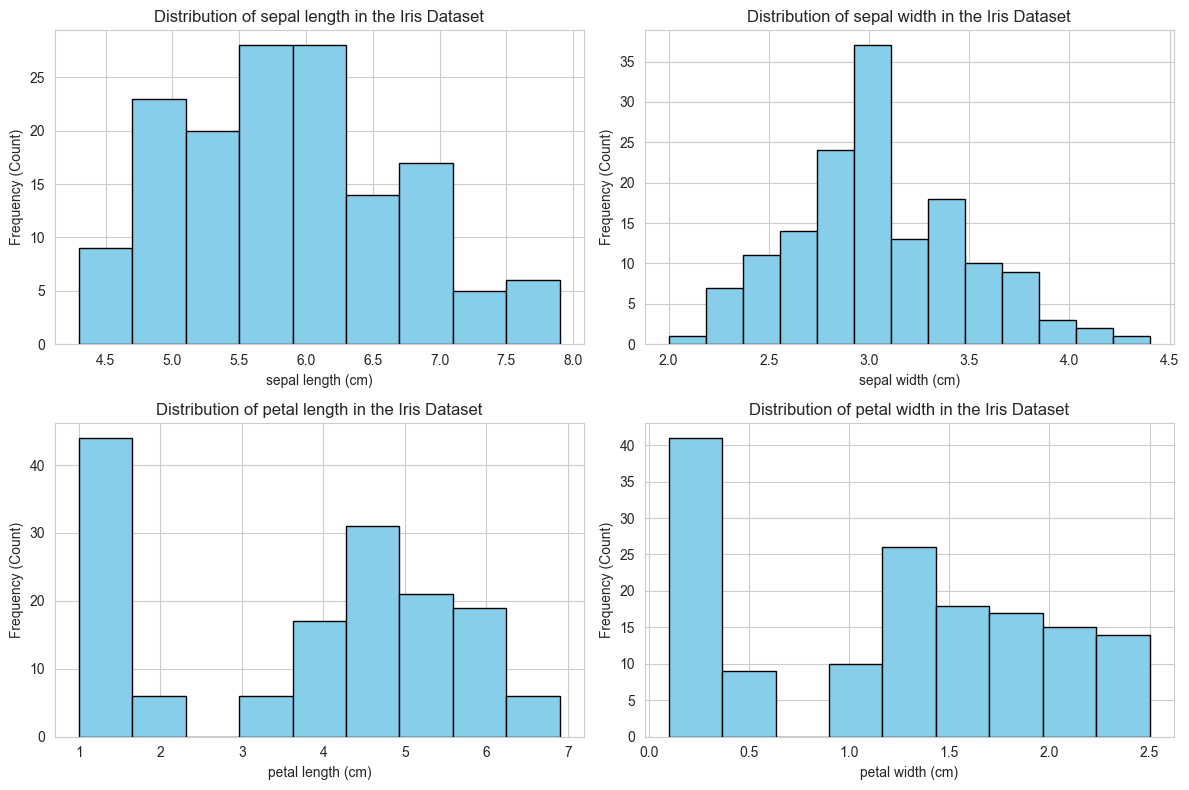

In [7]:
features = iris.feature_names
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

for feature, ax in zip(features, axes.flatten()):
    ax.hist(iris_df[feature], bins='auto', color='skyblue', edgecolor='black')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency (Count)')
    ax.set_title(f"Distribution of {feature.replace(' (cm)', '')} in the Iris Dataset")

plt.tight_layout()
plt.show()


## Pairplot: Visualizing Feature Relationships and Class Separation

The pairplot below visualizes the relationships between all pairs of features in the Iris dataset, colored by species. This is a powerful way to observe how well the features separate the three classes.

**Key Observations:**
- **High-Value Features:** Petal length and petal width are the most predictive features. The scatter plot between these two shows the clearest separation between the three species.
- **A Tale of Two Challenges:**
    1. **The "Easy" Case:** The setosa species forms a tight, separate cluster, especially in petal dimensions. It is linearly separable from the other classes.
    2. **The "Hard" Case:** Versicolor and virginica overlap considerably. Their centers are distinct, but there is no simple straight line that perfectly separates all their data points.

**Justification for Choosing K-Nearest Neighbors (KNN):**
- The observations above directly inform our model choice. A simple linear model (like Logistic Regression or a linear SVM) would easily separate setosa from the rest, but would struggle with the non-linear boundary needed to distinguish versicolor from virginica.
- **KNN** is a non-parametric, instance-based algorithm that does not assume linear boundaries. It classifies new points based on the majority class among their k nearest neighbors, allowing for flexible, non-linear decision boundaries.
- This flexibility enables KNN to effectively handle the overlap between versicolor and virginica, which is the main challenge identified in our exploratory analysis.

Our hypothesis is that KNN will achieve near-perfect accuracy on setosa and perform well in distinguishing between versicolor and virginica, thanks to its ability to model complex, non-linear relationships.

---

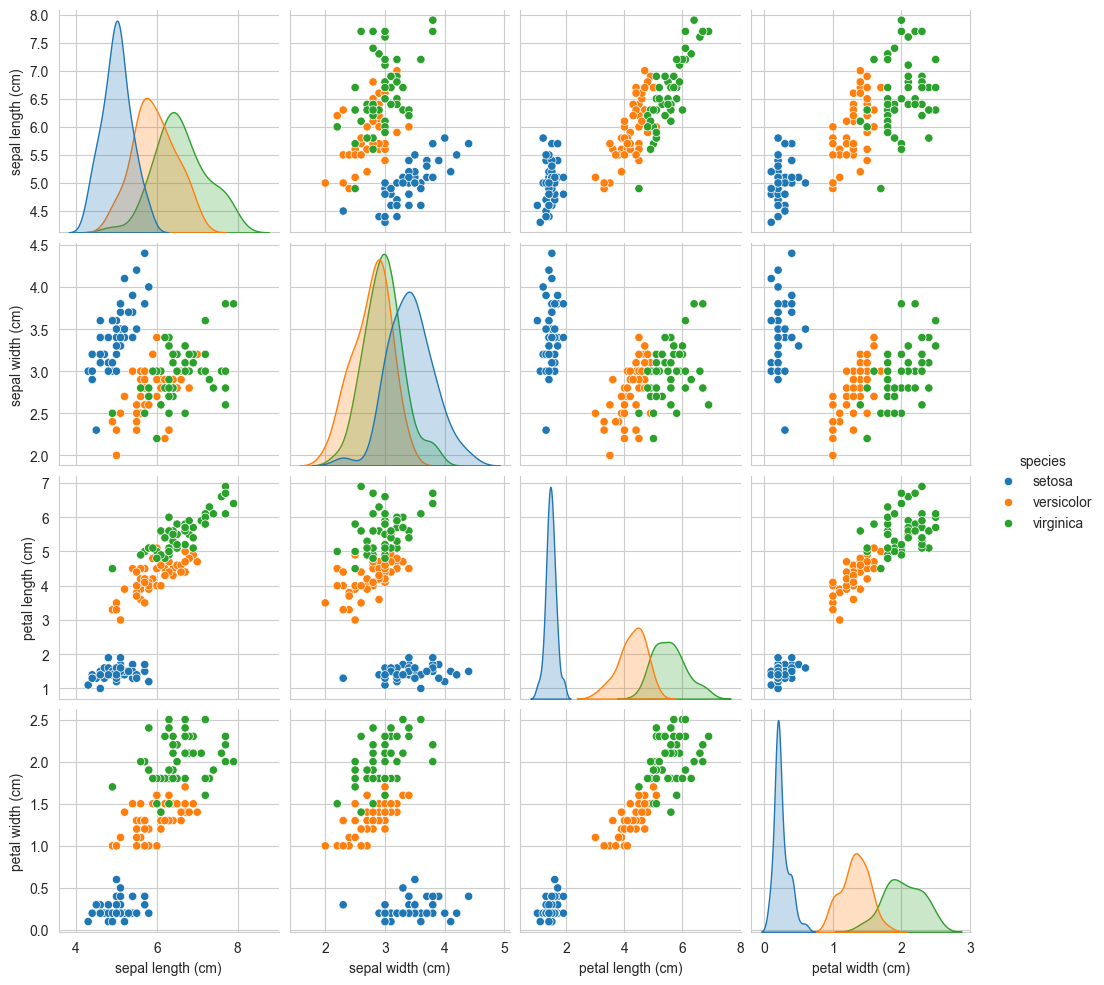

In [8]:
import seaborn as sns

sns.pairplot(data=iris_df, hue='species')
plt.show()

## Preparing the Dataset for KNN: Preprocessing Steps

Before training a KNN model, it is important to preprocess the dataset. As observed in the `.describe()` output, the features (sepal length, sepal width, petal length, petal width) are not on the same scale. petal measurements, for example, have a different range and spread compared to sepal measurements. 

KNN is a distance-based algorithm, so features with larger scales can dominate the distance calculation and bias the model. To ensure fair contribution from all features, we need to **standardize or normalize** the feature values so that each feature has the same scale (typically zero mean and unit variance).

**Next Steps:**
- Split the dataset into features and target.
- Apply feature scaling (such as StandardScaler) to the input features.
- Proceed to train and evaluate the KNN model using the preprocessed data.

In [9]:
X = iris_df.drop('species', axis=1)
print(X.head())
y = iris_df['species']
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


### Data Splitting and Preparation

#### Train-Test Split
To evaluate the model's performance on unseen data, I split the dataset into a training set and a testing set.

*   **Strategy:** I used an 80/20 split, allocating 80% of the data for training the model and reserving the remaining 20% for testing. This is a common convention that provides enough data for the model to learn the underlying patterns while leaving a statistically significant portion for a robust evaluation.

*   **Reproducibility:** I set `random_state=42`. While 42 is a fun nod in the data science community, the technical reason is critical: it ensures **reproducibility**. By fixing the random state, we guarantee that the same rows of data are assigned to the training and testing sets every time the code is run. This creates a stable baseline, making it possible to fairly compare the results of different models or hyperparameter changes. Without it, a change in performance could be due to a change in the model or simply due to a "luckier" or "unluckier" data split.


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of the X_train split - {X_train.shape}")
print(f"Shape of the X_test split - {X_test.shape}")


Shape of the X_train split - (120, 4)
Shape of the X_test split - (30, 4)


#### Feature Scaling
After splitting the data, the next critical step is to scale the features.

*   **The 'Why': The Need for Feature Scaling with KNN**

    The K-Nearest Neighbors algorithm classifies a data point based on the "distance" to its neighbors. The default distance metric is Euclidean distance. The formula for this distance is sensitive to the scale of the features.

    For instance, imagine we had two features: `petal_length` (e.g., 1.4 cm) and `petal_area` (e.g., 25 mm²). A change of 1 unit in `petal_area` would have a much larger impact on the distance calculation than a change of 1 unit in `petal_length`, simply because its numerical value is larger. This would cause the `petal_area` feature to unfairly dominate the model's decision-making process.

    To prevent this, we must scale our features so that they all have a comparable range and contribute equally to the distance calculation.

*   **The 'How': Applying `StandardScaler`**

    I chose to use Scikit-learn's `StandardScaler`. This tool transforms each feature so that it has a mean of 0 and a standard deviation of 1. This process, known as standardization, is a standard requirement for many machine learning algorithms.

    It's important to fit the scaler **only on the training data** and then use that same fitted scaler to transform both the training and the test data. This prevents "data leakage," where information from the test set inadvertently influences the training process, leading to an overly optimistic evaluation of the model's performance.


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Type of the scaled data - {type(X_train_scaled)}")
print("First 5 rows of scaled training data: \n", X_train_scaled[:5])


Type of the scaled data - <class 'numpy.ndarray'>
First 5 rows of scaled training data: 
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]


### Model Selection and Training

#### Choosing the K-Nearest Neighbors (KNN) Algorithm
For this classification task, I selected the K-Nearest Neighbors (KNN) algorithm. My reasoning was as follows:

*   **Simplicity and Intuitiveness:** KNN is a straightforward and easy-to-understand algorithm. It makes predictions based on the majority class of the 'k' closest data points in the feature space.
*   **Suitability based on EDA:** Our Exploratory Data Analysis revealed that the Iris species form relatively distinct clusters, especially when considering the petal dimensions. This visual separation suggests that a distance-based algorithm like KNN, which relies on "closeness," is likely to be effective.
*   **Non-parametric Nature:** KNN makes no assumptions about the underlying data distribution, which makes it a flexible choice.

#### Fitting the Classifier
The model was trained using the `KNeighborsClassifier` from Scikit-learn.

The `.fit()` method was called using the scaled training features (`X_train_scaled`) and the corresponding target labels (`y_train`). 

For the initial training, a common default value for the number of neighbors (e.g., `n_neighbors=3`) was used. The next step in our process will be to systematically evaluate the model and tune this hyperparameter to find its optimal value.


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Making Predictions on the Test Set

With the model trained, the next step is to evaluate its ability to generalize to new, unseen data. We do this by feeding the scaled test features (`X_test_scaled`) into our trained classifier and asking it to predict the species for each flower.

The `.predict()` method takes the test data and, for each data point, performs the KNN algorithm: it finds the 'k' nearest points in the original training data and assigns the most common class among those neighbors. The output will be an array of predicted labels for our entire test set.


In [13]:
y_pred = knn_model.predict(X_test_scaled)

### Model Evaluation

After making predictions on the test set, the crucial next step is to evaluate the model's performance. A single metric like accuracy can be misleading, so I will use a combination of metrics to get a comprehensive understanding of the model's strengths and weaknesses.

#### a) Accuracy Score
This metric provides a high-level view of performance by calculating the proportion of total correct predictions.

`Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)`

While useful, it doesn't tell the whole story, especially if the model performs differently across the various classes.

#### b) Confusion Matrix
The confusion matrix provides a more detailed breakdown of the model's performance. It's a table that visualizes where the model made correct predictions and where it got "confused."

*   **Rows:** Represent the actual, true labels of the data.
*   **Columns:** Represent the labels predicted by the model.
*   **Diagonal values (top-left to bottom-right):** Indicate the number of correct predictions for each class.
*   **Off-diagonal values:** Indicate the number of errors and, more importantly, *how* the classes were confused (e.g., a `versicolor` being misclassified as a `virginica`).

#### c) Classification Report
This report provides a convenient summary of the key classification metrics on a per-class basis. This is essential for understanding if the model is biased towards or against a particular class. The key metrics included are:

*   **Precision:** Of all the instances the model predicted to be a certain class, how many were actually correct? (Measures exactness).
*   **Recall:** Of all the actual instances of a certain class, how many did the model correctly identify? (Measures completeness).
*   **F1-Score:** The harmonic mean of precision and recall, providing a single score that balances both. It's a robust metric, especially for imbalanced datasets.
*   **Support:** The number of actual occurrences of each class in the test set.


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_score = accuracy_score(y_test, y_pred)
print("**************** Accuracy Score *****************")
print(f"Accuracy score : {acc_score: .2f}")

print("**************** Confusion matrix *****************")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("**************** Classification Report *****************")
report = classification_report(y_test, y_pred)
print(report)

**************** Accuracy Score *****************
Accuracy score :  1.00
**************** Confusion matrix *****************
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
**************** Classification Report *****************
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Investigating Model Robustness

#### An Important Observation: Is 100% Accuracy Too Good to Be True?
Upon initial evaluation with `random_state=42`, the model achieved a 100% accuracy score on the test set. While this seems like a perfect result, it's crucial to be skeptical. This score is based on a single, random partition of the data. It's highly possible we simply got a "lucky split," where the test set happened to contain only examples that were easy for the model to classify.

A reliable model should perform well consistently, not just on one specific data split.

#### Experiment: Testing the Impact of the `random_state`
To test the hypothesis of a "lucky split," I will perform an experiment. I will keep the model and its hyperparameters constant (using `n_neighbors=3` as an example) and re-run the entire training and evaluation process multiple times.

The only thing that will change in each iteration is the `random_state` for the `train_test_split`. By running the split with different seeds, we are essentially simulating different random shuffles of the data.

By recording and observing the accuracy scores from these different splits, we can directly measure how sensitive our evaluation metric is to the randomness of the data partition. If the scores vary significantly, it will confirm that a single train-test split is not a reliable method for assessing a model's true performance and will motivate the need for a more robust evaluation technique.


In [15]:
for random_seed in [42, 53, 67, 76, 85, 99, 101, 126]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)

    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy score : {acc_score: .2f} with the random state : {random_seed}")


Accuracy score :  1.00 with the random state : 42
Accuracy score :  0.90 with the random state : 53
Accuracy score :  0.93 with the random state : 67
Accuracy score :  0.97 with the random state : 76
Accuracy score :  0.93 with the random state : 85
Accuracy score :  0.93 with the random state : 99
Accuracy score :  0.93 with the random state : 101
Accuracy score :  1.00 with the random state : 126


### Experiment Results and Interpretation

The experiment of re-running the train-test split with different `random_state` values yielded the following accuracy scores:

*   `random_state=42`: **100%**
*   `random_state=53`: **90.0%**
*   `random_state=67`: **93.3%**
*   `random_state=76`: **96.7%**
*   `random_state=85`: **93.3%**
*   `random_state=99`: **93.3%**
*   `random_state=101`: **93.3%**
*   `random_state=126`: **100%**

#### Conclusion
The results clearly confirm our hypothesis. The model's reported accuracy is highly sensitive to the specific data points that land in the test set, with scores fluctuating between 90% and 100%. This demonstrates that a single train-test split is **not a robust method** for evaluating a model's true predictive power.

### 9. Finding the Optimal Value for K (n_neighbors)

Having understood the limitations of our evaluation method, the next logical step is to tune our model's primary hyperparameter: `k`, the number of neighbors. The choice of `k` is critical as it determines the model's complexity.

*   A **small `k`** makes the model highly sensitive to noise (high variance, low bias).
*   A **large `k`** can oversmooth the decision boundary, failing to capture the underlying pattern (low variance, high bias).

To find the optimal `k`, I will now iterate through a range of `k` values and plot their corresponding error rates. For the sake of this demonstration, I will revert to using a fixed `random_state=42` to ensure that the changes we observe are due to the changing `k` value and not a different data split.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# iterating different k values (odd numbers)
for k in range(1, 26, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)

    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy score : {acc_score: .2f} with the random state : 42 and the k-value : {k}")

Accuracy score :  1.00 with the random state : 42 and the k-value : 1
Accuracy score :  1.00 with the random state : 42 and the k-value : 3
Accuracy score :  1.00 with the random state : 42 and the k-value : 5
Accuracy score :  1.00 with the random state : 42 and the k-value : 7
Accuracy score :  1.00 with the random state : 42 and the k-value : 9
Accuracy score :  1.00 with the random state : 42 and the k-value : 11
Accuracy score :  1.00 with the random state : 42 and the k-value : 13
Accuracy score :  1.00 with the random state : 42 and the k-value : 15
Accuracy score :  1.00 with the random state : 42 and the k-value : 17
Accuracy score :  1.00 with the random state : 42 and the k-value : 19
Accuracy score :  1.00 with the random state : 42 and the k-value : 21
Accuracy score :  1.00 with the random state : 42 and the k-value : 23
Accuracy score :  1.00 with the random state : 42 and the k-value : 25


### The "Lucky Split" Problem Confirmed

My previous experiment showed that different `random_state` values produced different accuracy scores. To further investigate, I fixed the `random_state` to 42, one of the splits that produced 100% accuracy, and then tried to tune the `k` hyperparameter.

The results were as follows:
*   For `k=1` to `k=25`, the accuracy score was consistently **100%**.

This result is a clear demonstration of the "lucky split" problem. The test set created by `random_state=42` is so "easy" that the model's performance appears perfect and insensitive to changes in the `k` hyperparameter. This makes it impossible to find a meaningful "optimal" `k`.

#### A More Realistic Evaluation
To find a more realistic optimal `k`, I will now repeat the hyperparameter tuning process using a different, randomly chosen seed: `random_state=99`. This split previously yielded a more believable accuracy score. By plotting the error rate against different `k` values on this new split, I expect to see a more typical "elbow" curve, which will allow for a more meaningful selection of the best `k` value.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) # Changed to 99
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 26, 2)
accuracy_scores = []

print("Testing k-values on a more challenging data split (random_state=99)...")
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

# Find and print the best k
best_k_index = np.argmax(accuracy_scores)
best_k = k_values[best_k_index]
print(f"\nBest performing k value is: {best_k} with an accuracy of {max(accuracy_scores):.2f}")

Testing k-values on a more challenging data split (random_state=99)...
Accuracy for k=1: 0.93
Accuracy for k=3: 0.93
Accuracy for k=5: 0.97
Accuracy for k=7: 0.97
Accuracy for k=9: 0.97
Accuracy for k=11: 0.97
Accuracy for k=13: 0.93
Accuracy for k=15: 0.93
Accuracy for k=17: 0.93
Accuracy for k=19: 0.93
Accuracy for k=21: 0.97
Accuracy for k=23: 0.97
Accuracy for k=25: 0.97

Best performing k value is: 5 with an accuracy of 0.97


11. Hyperparameter Tuning on a Realistic Split

After establishing that the initial `random_state=42` led to a "lucky split," the experiment was repeated on a more representative data partition (`random_state=99`). This allows for a meaningful analysis of how the hyperparameter `k` affects model performance.

#### Results
The model was trained and evaluated for `k` values from 1 to 25. The resulting accuracies on the test set were:

*   `k=1`: 93.3%
*   `k=3`: 93.3%
*   **`k=5`: 96.7%**
*   **`k=7`: 96.7%**
*   **`k=9`: 96.7%**
*   **`k=11`: 96.7%**
*   `k=13`: 93.3%
*   ...and so on, with performance fluctuating.

#### Interpretation and Choosing the Best `k`
This is a classic result. The model's performance improves as `k` increases from a very low value (moving away from a high-variance, noisy model) and then stabilizes.

Several `k` values (`5, 7, 9, 11, 21, 23, 25`) achieved the peak accuracy of 96.7%. When faced with multiple hyperparameters that yield the same top performance, the best practice is to choose the **simplest model**. In KNN, a smaller `k` results in a less complex, more localized decision boundary.

Therefore, **`k=5` is the optimal choice**. It is the smallest `k` that achieves the maximum accuracy on this data split.

#### Next Step: Visualization
To make this conclusion even clearer, the next step is to create an "elbow plot." By plotting the accuracy (or, more commonly, the error rate `1 - accuracy`) against the `k`-values, we can visually identify the "elbow" point where the model's performance gain diminishes, confirming our choice of `k=5`.


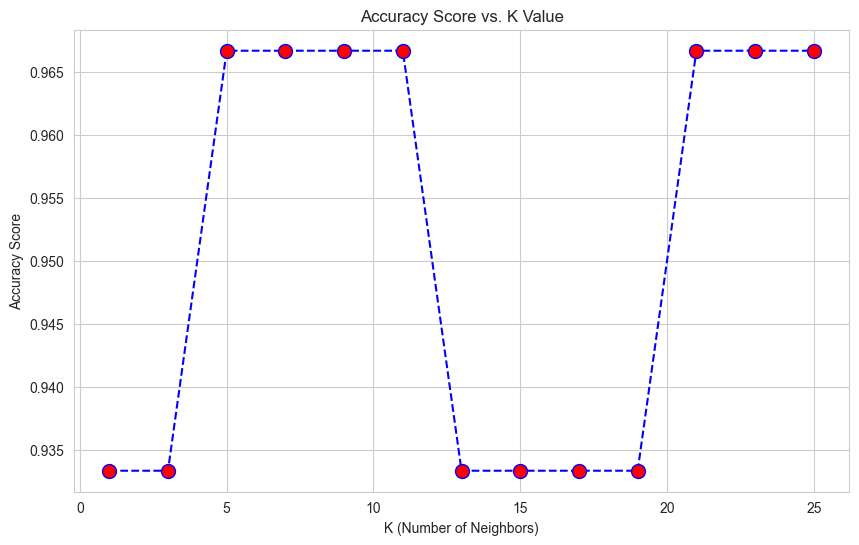

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

### The Professional Approach: Finding the Optimal K with Cross-Validation

Our experiments have definitively shown that a single train-test split is not a reliable way to evaluate a model or tune its hyperparameters. Even though we were able to find an optimal `k` by choosing a different `random_state`, that result is still tied to the luck of that one specific split. There is still a possibility of a "lucky split" influencing the outcome.

To get a truly robust estimate of our model's performance and find the best `k` value, we will now use the industry-standard technique: **K-Fold Cross-Validation**.

#### How It Works
Instead of one split, K-Fold Cross-Validation performs the training and testing process multiple times (`K` times, often 5 or 10). For each `k` value we want to test (e.g., from 1 to 25):

1.  The **entire dataset** is split into `K` folds (e.g., 5 folds).
2.  The model is trained and evaluated 5 times. In each run, a different fold is used as the test set, and the remaining 4 are used for training.
3.  The 5 accuracy scores are then **averaged** to get a single, more reliable performance metric for that specific `k` value.

By doing this for every `k` we are testing, we can find the hyperparameter that performs best on average, across all the data. This removes the randomness of the split from our decision-making process.

#### Next Step: Implementation
We will now use Scikit-learn's `cross_val_score` function inside a loop to calculate the average accuracy for a range of `k` values. We will then plot these scores to find the truly optimal `k`.

**Important Note:** Since cross-validation handles the splitting of data internally, we will use the **full, un-split dataset** (`X` and `y`) for this process. However, it is still crucial to use the **scaled features** to ensure fair distance calculations. We will create a `Pipeline` to bundle the scaling and KNN model together, which is the standard best practice to prevent data leakage during cross-validation.


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

k_values = range(1, 26, 2)
cv_scores = []

print("Running 10-fold cross-validation for k values from 1 to 25...")
for k in k_values:
    pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print("Cross-validation scores calculated for each k-value.")


for k, score in zip(k_values, cv_scores):
    print(f"k={k}, Average Accuracy: {score:.4f}")

Running 10-fold cross-validation for k values from 1 to 25...
Cross-validation scores calculated for each k-value.
k=1, Average Accuracy: 0.9533
k=3, Average Accuracy: 0.9533
k=5, Average Accuracy: 0.9533
k=7, Average Accuracy: 0.9533
k=9, Average Accuracy: 0.9533
k=11, Average Accuracy: 0.9467
k=13, Average Accuracy: 0.9533
k=15, Average Accuracy: 0.9600
k=17, Average Accuracy: 0.9467
k=19, Average Accuracy: 0.9467
k=21, Average Accuracy: 0.9400
k=23, Average Accuracy: 0.9467
k=25, Average Accuracy: 0.9467


### Interpreting the Cross-Validation Results

The 10-fold cross-validation has provided a much more reliable estimate of our model's performance for each `k` value. By averaging the scores from 10 different train-test splits, we have effectively removed the "luck of the draw" from our evaluation.

#### Key Findings from the Results:

*   **Increased Stability:** The accuracy scores are now much more stable, mostly ranging between 94% and 96%. This is a strong indication that we are measuring the true, generalized performance of the model, rather than an artifact of a single data split.
*   **A New Optimal `k`:** The peak performance was achieved at **`k=15`**, with an average accuracy of **96.0%**. This is a different and more trustworthy result than the `k=5` we found using a single, potentially "lucky" data split. This highlights the critical importance of using robust evaluation techniques like cross-validation.

#### Conclusion and Final Model Selection

Based on this comprehensive and robust evaluation, **`k=15` is the optimal hyperparameter for our final model**. It is the value that provides the best generalization performance on average across multiple subsets of our data.

#### Next Step: The Definitive Visualization

The final step in our analysis is to visualize these cross-validated scores. An "elbow plot" using these robust scores will provide a clear, compelling visual to support our conclusion and will serve as the capstone of our hyperparameter tuning process.

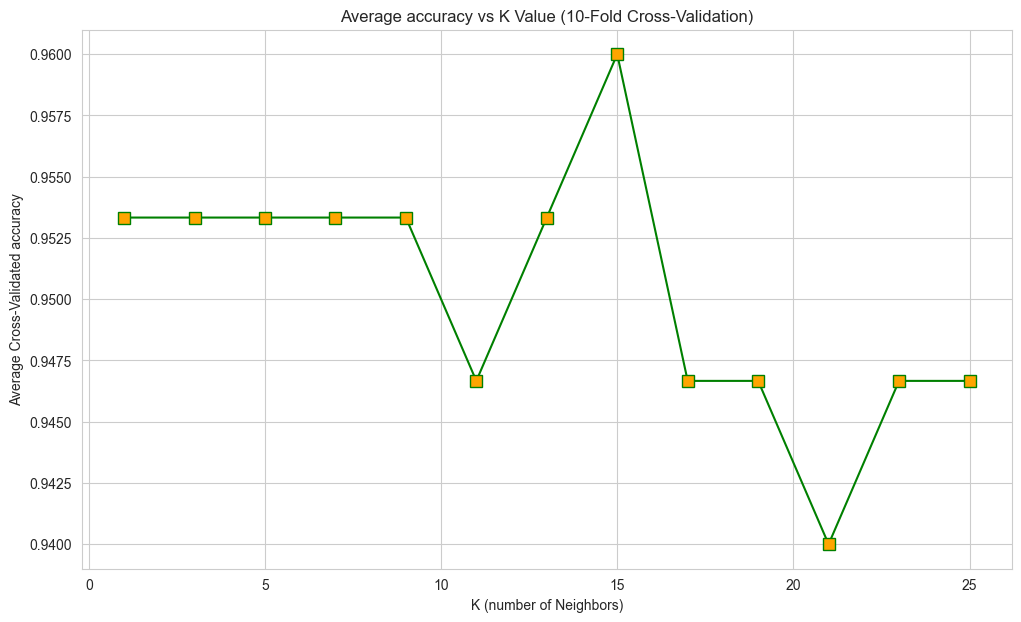

In [20]:
plt.figure(figsize=(12, 7))
plt.plot(k_values, cv_scores, color='green', linestyle='-', marker = 's', markerfacecolor='orange', markersize=8)
plt.xlabel("K (number of Neighbors)")
plt.ylabel("Average Cross-Validated accuracy")
plt.title("Average accuracy vs K Value (10-Fold Cross-Validation)")
plt.grid(True)
plt.show()

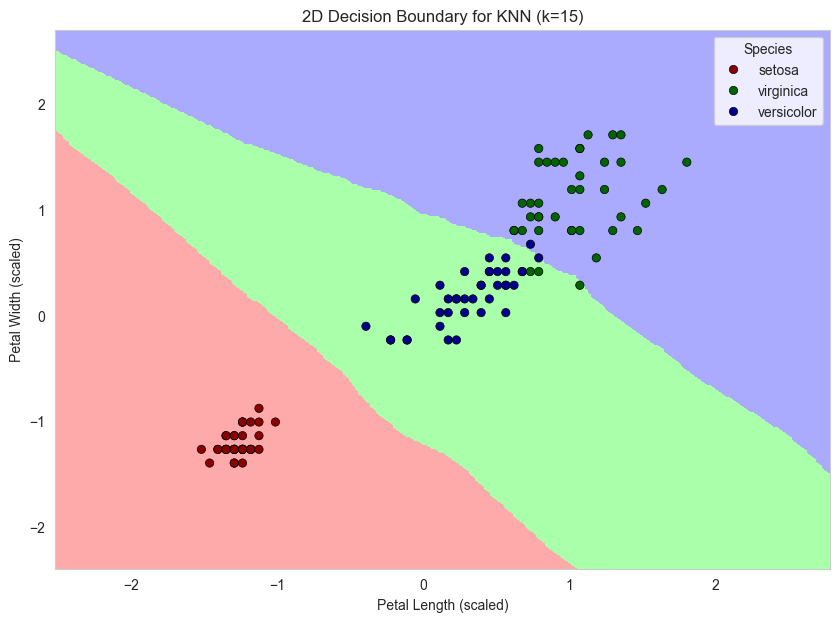

In [23]:
from matplotlib.colors import ListedColormap
import numpy as np

# --- 1. Prepare Data for Visualization ---
# We re-split and scale the data to ensure our visualization is based on a consistent
# training set. We use random_state=99 again for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Train the Final Model on 2 Features ---
# We instantiate the final model with our optimal k=15, found via cross-validation.
final_k = 15
final_model = KNeighborsClassifier(n_neighbors=final_k)

# IMPORTANT: To visualize a decision boundary, we can only use two features (for a 2D plot).
# We select the two most predictive features identified in our EDA: petal length and petal width.
X_train_2_features = X_train_scaled[:, [2, 3]]
final_model.fit(X_train_2_features, y_train)

# --- 3. Create a Mesh Grid for Plotting ---
# A mesh grid is a grid of points that covers the entire feature space of our plot.
# We will predict the class for every single point on this grid to create the colored regions.
x_min, x_max = X_train_2_features[:, 0].min() - 1, X_train_2_features[:, 0].max() + 1
y_min, y_max = X_train_2_features[:, 1].min() - 1, X_train_2_features[:, 1].max() + 1

# np.meshgrid creates coordinate matrices from the x and y coordinate vectors.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# --- 4. Predict on the Grid and Convert to Numeric ---
# Use the trained model to predict the species for every point in the mesh grid.
# The output, Z_str_predictions, is an array of strings ('setosa', 'versicolor', etc.).
Z_str_predictions = final_model.predict(np.c_[xx.ravel(), yy.ravel()])

# The plt.contourf function cannot work with string labels. It needs numbers (0, 1, 2)
# to map to the colors. We use a dictionary to convert the string predictions to numbers.
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
Z_numeric = pd.Series(Z_str_predictions).map(species_map).values

# Finally, we reshape the 1D array of numeric predictions back into the 2D grid shape.
Z = Z_numeric.reshape(xx.shape)

# --- 5. Create the Decision Boundary Plot ---
plt.figure(figsize=(10, 7))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # Colors for the regions
cmap_bold = ['darkred', 'darkgreen', 'darkblue']             # Colors for the data points

# 1. plt.contourf: This is the key function. It takes the grid coordinates (xx, yy)
#    and the numeric predictions (Z) and fills the background with colors based on the
#    predicted class for each region.
plt.contourf(xx, yy, Z, cmap=cmap_light)

# 2. sns.scatterplot: We overlay the actual training data points on top of the
#    colored regions to see how well the model's boundary separates the classes.
sns.scatterplot(x=X_train_2_features[:, 0], y=X_train_2_features[:, 1],
                hue=y_train, palette=cmap_bold, alpha=1.0, edgecolor="black")

# --- 6. Final Touches ---
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2D Decision Boundary for KNN (k={final_k})")
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend(title='Species')
plt.show()

### Project Conclusion and Final Model Visualization

The final step in our analysis is to visualize the decision boundary of our optimized model (`k=15`). This plot allows us to *see* how the model has learned to partition the feature space to classify the different iris species. The visualization is based on the two most predictive features identified during our EDA: petal length and petal width.

#### Interpretation of the Decision Boundary

*   **Colored Regions:** Each colored region (red, green, blue) represents an area where any new data point would be classified as a specific species by our final model.
*   **Data Points:** The scatter points are the actual data from our training set.
*   **The `setosa` Class (Red):** As expected from our EDA, the `setosa` species is linearly separable and sits in its own distinct region. The model has no trouble classifying it.
*   **The `versicolor` and `virginica` Boundary (Green/Blue):** This is where the model's true challenge lies. The boundary between these two classes is not a simple straight line. The `k=15` model has created a smooth, generalized boundary that effectively navigates the overlapping data points. This confirms our hypothesis: a larger `k` value, chosen through robust cross-validation, results in a less complex model that is better at handling the inherent noise and overlap between these two classes.

### Final Summary

This project successfully navigated the end-to-end machine learning workflow, from initial data exploration to building a robust, fine-tuned classification model.

The key takeaway was the critical importance of moving beyond a single train-test split. Our initial high-accuracy score was revealed to be an artifact of a "lucky" data partition. By employing 10-fold cross-validation, we developed a much more reliable estimate of the model's true performance and identified a more optimal hyperparameter (`k=15`) than our initial analysis suggested.

The final model, validated and visualized, stands as a testament to a methodical and skeptical approach to data science, where robust evaluation is paramount to building trustworthy and effective predictive models.